# Wise SIRD Model ODE
### by Giovanni Luis Crocioni u2012149

__Definitions:__
<br>

|Variable | Meaning                                             |
|---------|-----------------------------------------------------|
|$W$:     | susceptible and wise                                |
|$R$:     | susceptible and risky                               |
|$I$:     | infectious                                          |
|$D$:     | dead                                                |
|$S$:     | individuals cured and who can no longer be infected |

__Reactions:__
<br>
$$
\begin{align}
    W &\rightarrow^a R\\
    R &\rightarrow^{\alpha} W\\
    R + I &\rightarrow^c 2I\\
    W + I &\rightarrow^b 2I\\
    I &\rightarrow^{\beta} W\\
    I &\rightarrow^d D\\
    I &\rightarrow^{\rho} S
\end{align}
$$

From these equations, we can use the mass-action logic to derive a system of ODEs, which I write up in 'ode_system' below.

In [63]:
#All the necessary imports, including to visualise the graph interactively
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

# Define the system of ODEs in terms of x, y, and t
def WISE_SIRD_ODE(alpha = 0.1, a = 0.03, c = 0.1, b = 0.1, beta = 0.2, d = 0.02, rho = 0.01):
    def ode_system(variables, t):
        W, R, I, D, S = variables
        dWdt = -a * W + alpha * R - b * W * I + beta * I  
        dRdt = a * W - alpha * R - c * R * I  
        dIdt = c * R * I + b * W * I - beta * I - d * I - rho * I
        dDdt = d * I  
        dSdt = rho * I  
        return [dWdt, dRdt, dIdt, dDdt, dSdt]

    # Define the initial values for W, R, I, D, S
    initial_values = [749, 50, 1, 0, 0]  # Initial values for W, R, I, D, S

    # Define the time span
    t = np.linspace(0, 100, 100)  # Time points

    # Solve the ODE system using odeint
    solution = odeint(ode_system, initial_values, t)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(t, solution[:, 0], label='W')
    plt.plot(t, solution[:, 1], label='R')
    plt.plot(t, solution[:, 2], label='I')
    plt.plot(t, solution[:, 3], label='D')
    plt.plot(t, solution[:, 4], label='S')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title('Solution of the ODE System for W, R, I, D, S using odeint')
    plt.legend()
    plt.grid(True)
    plt.show()

# WISE_SIRD_ODE(alpha, a, c, b, beta, d, rho)

Use the interact feature to see the impact of changing parameters.

In [64]:
interact(WISE_SIRD_ODE, alpha = (0,1,0.01), 
                      a     = (0,1,0.01), 
                      c     = (0,1,0.01), 
                      b     = (0,1,0.01), 
                      beta  = (0,1,0.01), 
                      d     = (0,1,0.01),
                      rho   = (0,1,0.01)
                     );

interactive(children=(FloatSlider(value=0.1, description='alpha', max=1.0, step=0.01), FloatSlider(value=0.03,…

### Parameter study
By changing paramaters we can see very different behaviours. Here I'll summarises a few and attach graphs below. If we set rho = 0 and d greater than zero, everyone dies ultimately [Figure 1].  If on the other hand we set rho to be greater than zero and d = 0, then everyone ultimately recovers [Figure 2]. If we set rho and delta both greater than zero, then, depending on their relative value, people with either die or recover [Figure 3]. This assumes that all of the other parameters aren't configured in a way such that everyone is infected, risky or wise. For example setting rho and d to zero ensures everyone is always infected. Setting a and b to zero and and the rest non-zero results in everyone being wise. Setting alpha and c to zero, and, depending on the value of a, there remains a non-zero amount of risky people. [Figure 4]. All these relations can be deduced from the differential equations. If all the parameters are non-zero, the sensitivity of the number of Wise, Risky and Infected populations is small, likely because unlike dead and saved people, the differential equations governing their trajectories are more complicated and depend on many variables. 

Figure 1


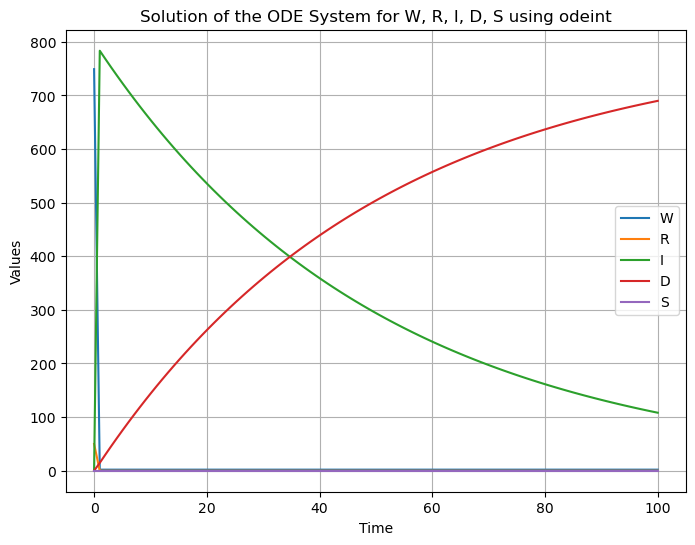

In [65]:
print('Figure 1')

WISE_SIRD_ODE( rho = 0)

Figure 2


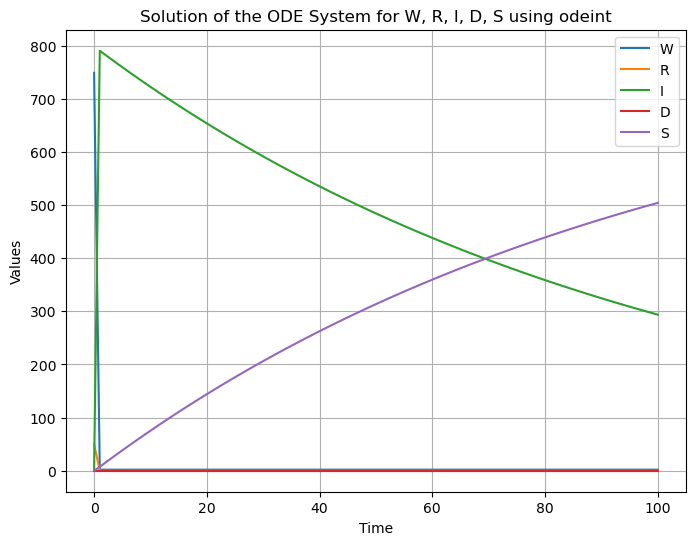

In [66]:
print('Figure 2')
WISE_SIRD_ODE( d = 0)

Figure 3


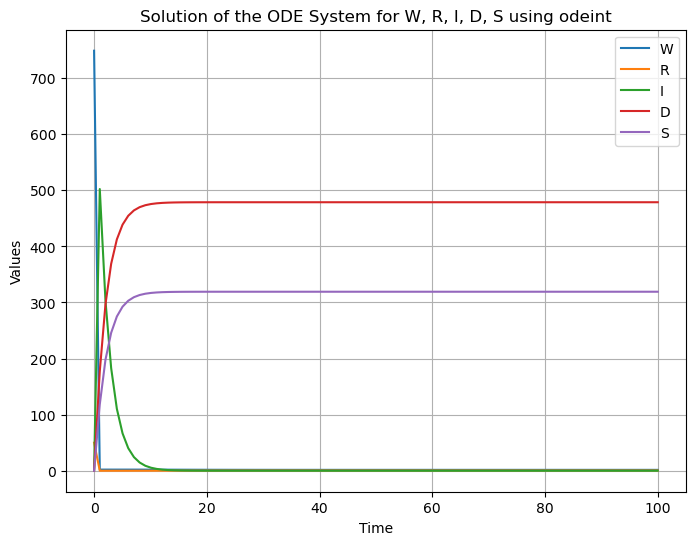

In [67]:
print('Figure 3')

WISE_SIRD_ODE( rho = 0.2, d = 0.3)

Figure 4


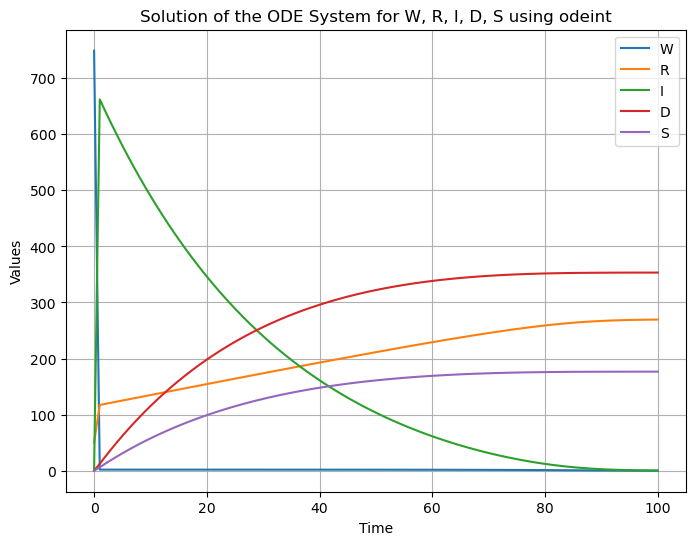

In [68]:
print('Figure 4')

WISE_SIRD_ODE( alpha = 0, c = 0, a = 1)